In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [14]:
# Connect to your SQLite database (it could be a file like 'database.db')
conn = sqlite3.connect('TP2_database.db')

# Define the SQL query
sql_query = """
SELECT REGIONAL, COUNT(*) AS num_viagens
FROM coletas
GROUP BY REGIONAL;
"""
df_num_viagens = pd.read_sql_query(sql_query, conn)

sql_query = """
SELECT REGIONAL, COUNT(*) AS num_pessoas
FROM cadunico
GROUP BY REGIONAL;
"""
df_num_pessoas = pd.read_sql_query(sql_query, conn)

# Merge the dataframes on 'REGIONAL'
df_merged = pd.merge(df_num_viagens, df_num_pessoas, on='REGIONAL')

# Display the result
print(df_num_viagens)
print(df_num_pessoas)

# Close the connection
conn.close()


        REGIONAL  num_viagens
0       BARREIRO         2743
1     CENTRO SUL         4331
2   CTR MACAéBAS           36
3     CTRS-BR040            1
4         DR.OPE          212
5          LESTE         2171
6       NORDESTE         3049
7       NOROESTE         2504
8          NORTE         2610
9          OESTE         3352
10      PAMPULHA         3344
11    VENDA NOVA         3180
                          REGIONAL  num_pessoas
0                         BARREIRO        54527
1                       CENTRO-SUL        28738
2  ENDEREÃO NÃO GEORREFERENCIADO        31385
3                            LESTE        37412
4                         NORDESTE        47788
5                         NOROESTE        35932
6                            NORTE        53801
7                            OESTE        41022
8                         PAMPULHA        29155
9                       VENDA NOVA        56348


     REGIONAL  num_viagens  num_pessoas
0    BARREIRO         2743        54527
1       LESTE         2171        37412
2    NORDESTE         3049        47788
3    NOROESTE         2504        35932
4       NORTE         2610        53801
5       OESTE         3352        41022
6    PAMPULHA         3344        29155
7  VENDA NOVA         3180        56348


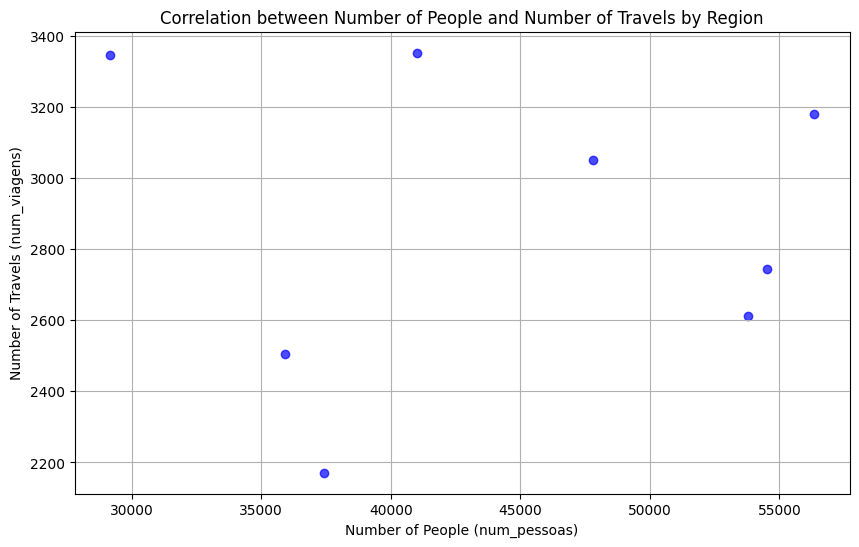

In [ ]:
# Plotting the correlation graph
plt.figure(figsize=(10, 6))
print(df_merged)
plt.scatter(df_merged['num_pessoas'], df_merged['num_viagens'], color='blue', alpha=0.7)

# Adding labels and title
plt.title('Correlação entre o número de pessoas no cadastro único e o número de viagens')
plt.xlabel('Number of People (num_pessoas)')
plt.ylabel('Number of Travels (num_viagens)')

# Show the plot
plt.grid(True)
plt.show()